# Как отличить кошку от собаки? 

<tr>
<td> <img src="images/dog.jpg" alt="Drawing" style="width: 820px;height: 300px"/> </td>
<td> <img src="images/cat.jpg" alt="Drawing" style="width: 820px;height: 300px"/> </td>
</tr>

# Постановка задачи

![image](images/introdution.png)

# Основные типы задач

### 1) Классификация.
Мы уже рассмотрели задачу классификации на примере собак и кошек. По сути главной задачей классификации является разделение объектов на классы. Это может быть 2 класса, как в нашем примере (кошка или собака), тогда это называется **бинарной классификацией**

А может быть и разделением на **множество классов**. Например, определение по фотографии какая написана цифра.

<tr>
<td> <img src="images/mnist.png" alt="Drawing" style="width: 65%;height: 65%"/> </td>
</tr>

### 2) Линейная регрессия.
Тут все немного сложнее. В данном типе задач мы хотим установить какую-то **зависимость**. Например, рост человека по его весу или возрасту.

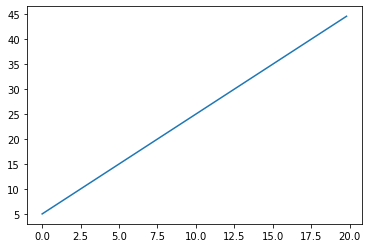

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0., 20., 0.2)
y = 2*x + 5
plt.plot(x, y)
plt.show()

То есть линейная регрессия подходит для такого типа задач, где один или несколько признаков потенциально могут иметь какую-то зависимость. Условно, заработная плата человека скорее всего зависит от его возраста, места проживания и образования. 

# Основные понятия и определения

Уже несколько раз было упомянуто про такие понятия как **объекты, признаки** и **ответы**. Пора разобраться с определениями.  

Давайте рассмотрим предыдущую задачу: определение заработной платы человека по его возрасту, месту проживанию и образованию.

**Объект** - В нашем случае объектом является **человек**. В нейронных сетях 1 объект обозначается как $x$, тогда множество объектов обозначается $X$

**Призаки** - В нашем случае признаками будут являться признаки человека, указанные в задаче, а именно его: **возраст, место проживание, образование**.  
В нейронных сетях обычно это называют признаками объекта и обозначаются как нижний индекс у $x_i$ объекта: $x_{i,1}$, $x_{i,2}$, ... , $x_{i,d}$.  
Например: второй признак первого объекта будем обозначать как $x_{1,2}$

P.S. Если с вещественными признаками, такими как возраст все понятно - они являются числами, то как нам определять признаки по типу "место проживание", "образование" и тд. ? Об этом будет рассказано на следующих уроках.

**Ответ** - В нашем случае будет **заработная плата**.  
В нейронных сетях по другому это еще называют целевой переменной. Именно эту переменную в конечном итоге нейросеть должна научиться определять. Обозначают ее как ответ на $x_i$ объекте - $y_i$. Тогда ответом на всей выборке $X$ будет множество $Y$

# Построение модели

Итак, мы уже знаем про выборку объектов, ответов. Пора строить модель.  
Из рисунка, который мы уже видели, мы поняли, что наша модель должна строиться из двух выборок: $X$ и $Y$

![image](images/introdution2.png)

Также стоит отметить, что когда мы говорим про выборку $X$, мы имеем ввиду матрицу "объектов-признаков", которая выглядит следующим образом:  

$$ X = \left( \begin{matrix}
x_{1,1} & x_{1,2} &... & x_{1,d}\\
... & ... & ... & ...\\
x_{\ell,d} & x_{\ell,2} &... & x_{\ell,d}
\end{matrix} \right),
Y= \left( \begin{matrix}
y_1\\
...\\
y_\ell
\end{matrix} \right)  $$
$\ell$ - количество объектов  
    d - количество признаков

## Задача модели

Если говорить простыми словами что нам нужно сделать, то это найти такую функцию, которая бы смогла приближать нашу **ограниченную выборку объектов** из $X$ в выборку ответов $Y$  
$f: X \to Y$  

После "нахождения" функции, мы сможем, используя ее, находить значение ответа $Y$ на любой выборке $X$

Терминами из математики это выглядит примерно вот так:


Задано множество объектов $X$, множество допустимых ответов $Y$, и существует *целевая функция* (target function) $y^*: X \to Y$, значения которой $y_i = y^*(x_i)$ известны только на конечном подмножестве объектов ${x_1,...,x_{\ell}}\subset X$. Пары «объект– ответ» $(x_i, y_i)$ называются *прецедентами*. Совокупность пар $X^{\ell} = (x_i,y_i)^{\ell}_{i=1}$ называется *обучающей выборкой* (training sample). 

Задача обучения *по прецедентам* заключается в том, чтобы по выборке $X_{\ell}$ *восстановить зависимость* $y^∗$, то есть построить *решающую функцию* (decision function) $a: X \to Y$, которая приближала бы целевую функцию $y^*(x)$, причём не только на объектах обучающей выборки, но и на всём множестве $X$. 

Решающая функция a должна допускать эффективную компьютерную реализацию; по этой причине будем называть её *алгоритмом*.


# Обучение модели

Для того, чтобы обучить модель, нам нужно как-то показывать ей правильно ли она ответила, или же ошиблась. А если ошиблась, то насколько сильно? Для этого в задачах обучения используют такое понятие как **функционал качества (loss function)**.

### Функционал качества (loss function)

Введем еще один термин как **предсказание модели** для $x_i$ объекта и будем обозначать его как $a_i$

Итак, модель используя какую-то сгенерированную функцию получила предсказание для $x_i$ объекта - $a_i$. Тогда для определения качества предсказания(loss), мы можем просто найти разницу между действительным ответом и тем, что получила модель $y_i - a_i$. Это и называется loss функцией

Однако мы можем получить в данной формуле ( $y_i - a_i$ ) отрицательное значение, и чтобы это избежать, мы можем взять модуль

$\mathscr{L} = |y_i - a_i|$

Теперь, подставив наш loss и пройдясь по всем объектом нашей выборке, мы можем найти функционал качества $Q$:  
$$Mean Absolute Error = \frac{1}{\ell} \sum_{i=1}^{\ell} (|y_i-a_i|)$$

На практике чаще применяется формула **Mean Squared Error (MSE)**, потому что если мы возводим в квадрат, то за большие отклонения, наш loss будет огромный, а это помогает модели быстрее сойтись.

$$MSE = \frac{1}{\ell} \sum_{i=1}^{\ell} (y_i-a_i)^2$$

### Минимизация отклонения

Если мы хотим, чтобы наша модель выдавала правильные ответы, это значит мы хотим, чтобы наш функционал качества $Q \to \min$

Это и **является классическим методом обучения**, по другому называемый минимизацией эмпирического риска (empirical risk minimization, ERM)

Суть в том, чтобы определить функционал качества $Q$ на обучающей выборке $X^\ell$ и минимизировать его. $Q \to \min$